In [ ]:
# Data Preprocessing
import pandas as pd
import numpy as np
import timeit
from sklearn.preprocessing import StandardScaler #normalisasi z-score
from sklearn.decomposition import PCA
# Data VizualizationS
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# DataFrame
data = pd.read_excel("data_penelitian.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   nip                     3655 non-null   int64 
 1   usia                    3655 non-null   int64 
 2   jenis_kelamin           3655 non-null   object
 3   masa_kerja              3655 non-null   int64 
 4   satuan_kerja            3655 non-null   object
 5   unit_satuan             3655 non-null   object
 6   ketersediaan_sistem     3655 non-null   int64 
 7   kemampuan_sistem        3655 non-null   int64 
 8   kemudahan_penggunaan    3655 non-null   int64 
 9   kemudahan_fasilitas     3655 non-null   int64 
 10  tingkat_pelayanan       3655 non-null   int64 
 11  ketersediaan_bantuan    3655 non-null   int64 
 12  kualitas_materi         3655 non-null   int64 
 13  kualitas_kuis           3655 non-null   int64 
 14  kualitas_video          3655 non-null   int64 
 15  kual

In [ ]:
# Cek duplikasi data
cekduplikasi1 = data.duplicated(subset=["nip"])
cekduplikasi1.value_counts()

False    3619
True       36
Name: count, dtype: int64

In [ ]:
# Menghapus duplikasi data
data = data.drop_duplicates(subset="nip")

In [ ]:
# Cek hasil penanganan duplikasi
cekduplikasi2 = data.duplicated(subset=["nip"])
cekduplikasi2.value_counts()

False    3619
Name: count, dtype: int64

In [ ]:
# Cek missing value
print(data.isnull().sum())
print()
print(data.describe())

nip                       0
usia                      0
jenis_kelamin             0
masa_kerja                0
satuan_kerja              0
unit_satuan               0
ketersediaan_sistem       0
kemampuan_sistem          0
kemudahan_penggunaan      0
kemudahan_fasilitas       0
tingkat_pelayanan         0
ketersediaan_bantuan      0
kualitas_materi           0
kualitas_kuis             0
kualitas_video            0
kualitas_gambartulisan    0
konsistensi_informasi     0
dtype: int64

                nip         usia   masa_kerja  ketersediaan_sistem  \
count  3.619000e+03  3619.000000  3619.000000          3619.000000   
mean   1.985038e+17    38.029014    15.003868             4.634982   
std    8.487507e+14     8.488309     8.015945             0.586095   
min    1.960122e+17    22.000000     1.000000             1.000000   
25%    1.980072e+17    32.000000     9.000000             4.000000   
50%    1.987032e+17    36.000000    14.000000             5.000000   
75%    1.991073e+17 

In [ ]:
# Select attribute
data = data[["usia","jenis_kelamin","masa_kerja","ketersediaan_sistem",
             "kemampuan_sistem","kemudahan_penggunaan","kemudahan_fasilitas",
             "tingkat_pelayanan","ketersediaan_bantuan","kualitas_materi",
             "kualitas_kuis","kualitas_video","kualitas_gambartulisan",
             "konsistensi_informasi"]]

In [ ]:
# Encode 'jenis_kelamin'
data['jenis_kelamin'] = data['jenis_kelamin'].map({'Laki-laki':1, 'Perempuan':2})

In [ ]:
# Normalisasi Z-Score
# Pemilihan fitur untuk Normalisasi
columns_to_normalize = ["usia","jenis_kelamin", "masa_kerja",
                        "ketersediaan_sistem", "kemampuan_sistem",
                        "kemudahan_penggunaan", "kemudahan_fasilitas",
                        "tingkat_pelayanan", "ketersediaan_bantuan",
                        "kualitas_materi", "kualitas_kuis",
                        "kualitas_video", "kualitas_gambartulisan",
                        "konsistensi_informasi"]

X = data[columns_to_normalize]

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Kembalikan hasil normalisasi ke DataFrame
data_normalized = pd.DataFrame(X_scaled, columns=columns_to_normalize)
data_normalized['z_score'] = data_normalized.mean(axis=1)

data_normalized.head(10)

,usia,jenis_kelamin,masa_kerja,ketersediaan_sistem,kemampuan_sistem,kemudahan_penggunaan,kemudahan_fasilitas,tingkat_pelayanan,ketersediaan_bantuan,kualitas_materi,kualitas_kuis,kualitas_video,kualitas_gambartulisan,konsistensi_informasi,z_score
0,2.942216,-0.742891,3.243501,0.622882,0.595097,-2.682105,0.645392,-1.719937,-0.981151,-2.222724,0.702921,-2.130682,0.735537,0.673389,-0.022754
1,2.824390,-0.742891,3.243501,0.622882,0.595097,-0.884764,0.645392,-0.907664,-0.981151,-0.706554,0.702921,-0.671659,0.735537,0.673389,0.367745
2,2.706565,-0.742891,2.619658,-1.083560,0.595097,-1.783435,-1.185074,-1.719937,-1.833885,-2.222724,-3.032572,-2.130682,-1.066703,-1.135812,-0.858283
3,2.706565,1.346093,3.118732,0.622882,-1.329528,-1.783435,0.645392,-1.719937,-1.833885,-2.222724,0.702921,-2.130682,0.735537,-2.945013,-0.291934
4,2.706565,1.346093,3.118732,0.622882,-1.329528,-1.783435,0.645392,-0.907664,-1.833885,-2.222724,-3.032572,-2.130682,-2.868942,-2.945013,-0.758199
5,2.706565,-0.742891,3.118732,0.622882,0.595097,-1.783435,0.645392,-0.907664,-0.981151,-1.464639,0.702921,-1.401170,0.735537,0.673389,0.179969
6,2.588740,1.346093,3.118732,0.622882,0.595097,-1.783435,0.645392,-1.719937,-1.833885,-2.222724,0.702921,-2.130682,0.735537,0.673389,0.095580
7,2.588740,1.346093,2.619658,0.622882,0.595097,-2.682105,0.645392,-1.719937,-0.981151,-2.222724,0.702921,-2.130682,0.735537,0.673389,0.056651
8,2.588740,-0.742891,2.120583,0.622882,0.595097,-2.682105,0.645392,-1.719937,-0.981151,-2.222724,0.702921,-2.130682,0.735537,0.673389,-0.128211
9,2.588740,1.346093,1.995815,0.622882,0.595097,-2.682105,0.645392,-1.719937,-0.981151,-2.222724,-1.164826,-2.130682,-1.066703,-1.135812,-0.379280


In [ ]:
# PCA

def dimension_reduction_pca(data):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    #Penerapan PCA
    pca = PCA(n_components=3)
    data_pca = pca.fit_transform(data_scaled)

    # Print ratio PCA
    print("Explained variance ratio:", pca.explained_variance_ratio_)

    #Buat DF untuk pengurangan dimensi
    data_pca_df = pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(data_pca.shape[1])])

    return data_pca_df

# function untuk mengurangi dimensi data
reduced_data = dimension_reduction_pca(data)

# Print DataFrame yang telah tertransformasi
print(reduced_data.head())

Explained variance ratio: [0.43391251 0.22814331 0.08438522]
        PC1       PC2       PC3
0  3.997628 -4.754329 -1.207890
1  2.022339 -3.809601 -2.247345
2  6.173650 -0.919445 -1.328001
3  5.024731 -2.591756 -0.258419
4  6.387232  0.203941 -0.559902


In [ ]:
# PCA

def dimension_reduction_pca(data_normalized):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_normalized)

    #Penerapan PCA
    pca = PCA(n_components=3)
    data_pca = pca.fit_transform(data_scaled)

    # Print ratio PCA
    print("Explained variance ratio:", pca.explained_variance_ratio_)

    #Buat DF untuk pengurangan dimensi
    data_pca_df = pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(data_pca.shape[1])])

    return data_pca_df

# function untuk mengurangi dimensi data
reduced_data_normalized = dimension_reduction_pca(data_normalized)

# Print DataFrame yang telah tertransformasi
print(reduced_data_normalized.head())

Explained variance ratio: [0.45916958 0.22117925 0.07992659]
        PC1       PC2       PC3
0  3.411078 -5.194558 -1.251289
1  1.352722 -4.154694 -2.343107
2  6.255392 -1.475270 -1.456395
3  4.679889 -3.151550 -0.539577
4  6.440240 -0.467156 -0.952593


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

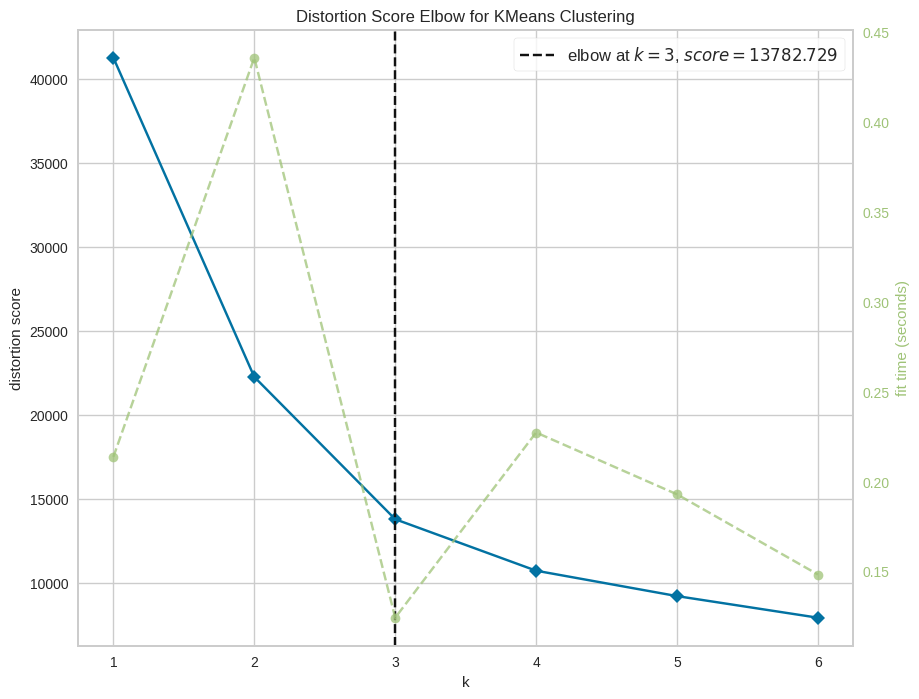

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Metode Elbow
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,7), size=(1000,800))

visualizer.fit(reduced_data_normalized)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

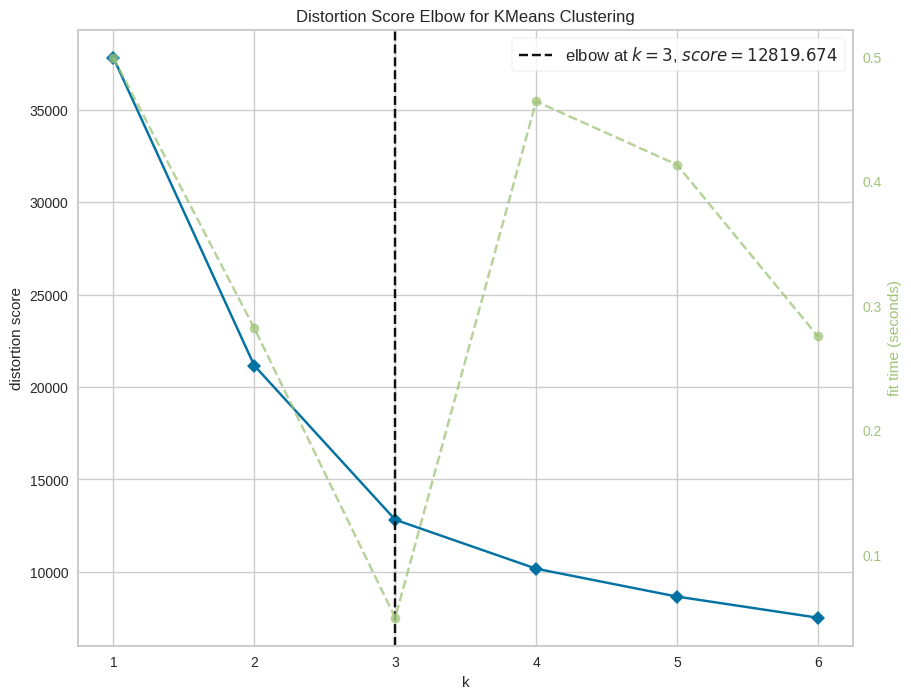

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Metode Elbow
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,7), size=(1000,800))

visualizer.fit(reduced_data)
visualizer.show()

In [ ]:
# Catat waktu mulai
start1 = timeit.default_timer()

# Penerapan K-Means clustering
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(reduced_data_normalized)
y_kmeans = kmeans.fit_predict(reduced_data_normalized)

# Hitung waktu komputasi KMeans
stop1 = timeit.default_timer()
# Time execution
waktu_komputasi1 = stop1 - start1
print(waktu_komputasi1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7638094839999212


In [ ]:
# Simpan prediksi cluster KMeans sebagai atribut
reduced_data_normalized['y_kmeans']=y_kmeans
#Cek jumlah data pada setiap cluster terbentuk
print(reduced_data_normalized['y_kmeans'].value_counts)
print(reduced_data_normalized['y_kmeans'].value_counts())

# Save to Excel
# data.to_excel("kmeans_result.xlsx", index=False)

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
3614    2
3615    0
3616    0
3617    0
3618    2
Name: y_kmeans, Length: 3619, dtype: int32>
y_kmeans
0    1878
2     929
1     812
Name: count, dtype: int64


In [ ]:
# Catat waktu mulai
start2 = timeit.default_timer()

# Penerapan K-Means++ clustering
kmeansplus = KMeans(init='k-means++',n_clusters=3,random_state=42)
# Membuat prediksi
y_kmeansplus = kmeansplus.fit_predict(reduced_data_normalized)

# Hitung waktu komputasi KMeans++
stop2 = timeit.default_timer()
# Time execution
waktu_komputasi2 = stop2 - start2
print(waktu_komputasi2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.393065930000148


In [ ]:
# Simpan prediksi cluster KMeans++ sebagai atribut
reduced_data_normalized['y_kmeansplus']=y_kmeansplus
#Cek jumlah data pada setiap cluster terbentuk
print(reduced_data_normalized['y_kmeansplus'].value_counts)
print(reduced_data_normalized['y_kmeansplus'].value_counts())

# Save to Excel
# data.to_excel("kmeansplus_result.xlsx", index=False)

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       2
3       2
4       2
       ..
3614    0
3615    1
3616    1
3617    1
3618    0
Name: y_kmeansplus, Length: 3619, dtype: int32>
y_kmeansplus
1    1878
0     929
2     812
Name: count, dtype: int64


In [ ]:
# Performa KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(reduced_data_normalized)
kmeans_labels = kmeans.labels_
kmeans_silhouette_score = silhouette_score(reduced_data_normalized, kmeans_labels)
print("Silhouette Score untuk KMeans:", kmeans_silhouette_score)
print('Jumlah Iterasi K-Means= ',getattr(kmeans,'n_iter_'))
print("Durasi Komputasi K-Means= ",waktu_komputasi1,"Detik")

# Performa KMeans++ clustering
kmeans_plus = KMeans(init='k-means++', n_clusters=3, random_state=42)
kmeans_plus.fit(reduced_data_normalized)
kmeans_plus_labels = kmeans_plus.labels_
kmeans_plus_silhouette_score = silhouette_score(reduced_data_normalized, kmeans_plus_labels)
print("Silhouette Score untuk KMeans++:", kmeans_plus_silhouette_score)
print('Jumlah Iterasi K-Means++= ',getattr(kmeansplus,'n_iter_'))
print("Durasi Komputasi K-Means++ = ",waktu_komputasi2,"Detik")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk KMeans: 0.5477346820930484
Jumlah Iterasi K-Means=  3
Durasi Komputasi K-Means=  0.7638094839999212 Detik


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk KMeans++: 0.5477346820930484
Jumlah Iterasi K-Means++=  3
Durasi Komputasi K-Means++ =  0.393065930000148 Detik


In [ ]:
# Cek hasil cluster yang dihasilkan pada kedua metode
a = list(reduced_data_normalized["y_kmeansplus"])
b = list(reduced_data_normalized["y_kmeans"])

sm = 0
bd = 0
for x in a :
  if a==b :
    sm = sm+1
  if a!=b :
    bd = bd+1

print("Jumlah cluster yang sama = ",sm)
print("Jumlah cluster yang berbeda = ",bd)

Jumlah cluster yang sama =  0
Jumlah cluster yang berbeda =  3619


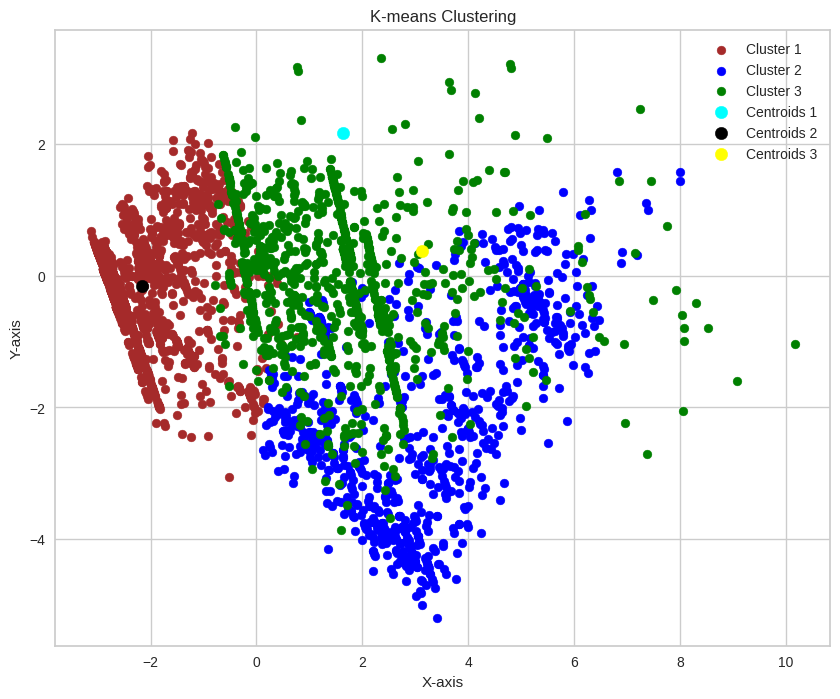

In [ ]:
# Ubah data frame menjadi Array
data = np.array(reduced_data_normalized)

# Cek y_means (Pandas) diubah ke (NumPy) Array
if isinstance(y_kmeans, pd.Series):
    y_kmeans = y_kmeans.to_numpy()

plt.figure(figsize=(10, 8))

# Scatter plot poin data pada tiap cluster
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=40, c='brown', label='Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=40, c='blue', label='Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 2], s=40, c='green', label='Cluster 3')

# Plot Centroid pada masing-masing cluster
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], s=80, c='aqua', label='Centroids 1')
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], s=80, c='black', label='Centroids 2')
plt.scatter(kmeans.cluster_centers_[2, 0], kmeans.cluster_centers_[2, 2], s=80, c='yellow', label='Centroids 3')

plt.title('K-means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

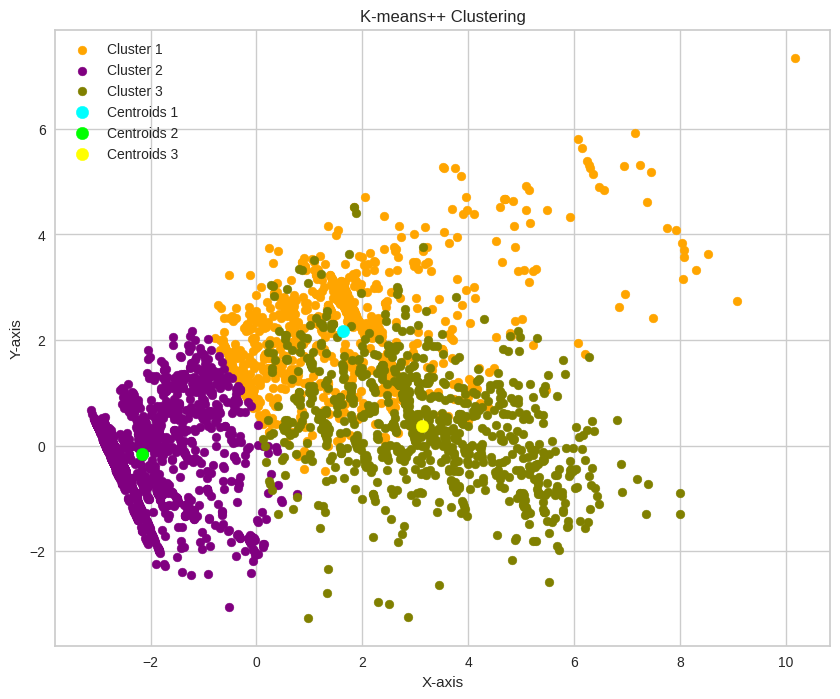

In [ ]:
# Ubah data frame menjadi Array
data = np.array(reduced_data_normalized)

# Cek y_kmeans (Pandas) diubah ke (NumPy) Array
if isinstance(y_kmeansplus, pd.Series):
    y_kmeansplus = y_kmeansplus.to_numpy()

plt.figure(figsize=(10, 8))

# Scatter plot poin data pada tiap cluster
plt.scatter(data[y_kmeansplus == 0, 0], data[y_kmeansplus == 0, 1], s=40, c='orange', label='Cluster 1')
plt.scatter(data[y_kmeansplus == 1, 0], data[y_kmeansplus == 1, 1], s=40, c='purple', label='Cluster 2')
plt.scatter(data[y_kmeansplus == 2, 0], data[y_kmeansplus == 2, 2], s=40, c='olive', label='Cluster 3')

# Plot Centroid pada masing-masing cluster
plt.scatter(kmeansplus.cluster_centers_[0, 0], kmeansplus.cluster_centers_[0, 1], s=80, c='aqua', label='Centroids 1')
plt.scatter(kmeansplus.cluster_centers_[1, 0], kmeansplus.cluster_centers_[1, 1], s=80, c='lime', label='Centroids 2')
plt.scatter(kmeansplus.cluster_centers_[2, 0], kmeansplus.cluster_centers_[2, 2], s=80, c='yellow', label='Centroids 3')

plt.title('K-means++ Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()